## Observations and Insights 

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_data = pd.merge(mouse_metadata, study_results, how = 'outer', on = "Mouse ID")
df_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [151]:
# Checking the number of mice.
mouse = df_data["Mouse ID"].unique()
total_mice = len(mouse)

pd.DataFrame({"Number of Mice": [total_mice]})

,Number of Mice
0,249


In [152]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df_data["Mouse ID"].value_counts().head()

g989    13
i557    10
z969    10
c139    10
o926    10
Name: Mouse ID, dtype: int64

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 
df_data_mice = df_data.set_index("Mouse ID")
mouse = df_data_mice.loc['g989', :]
mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = df_data_mice.drop(index = "g989")
clean_df_data = clean_mice_data.reset_index()
clean_df_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [155]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df_data["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
print(clean_number_of_mice)

248


## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen.
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = clean_df_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = clean_df_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = clean_df_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stdev = clean_df_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = clean_df_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
df_grouped_summary = pd.DataFrame({"Mean":tumor_mean,"Median":tumor_median,"Variance":tumor_var,"Standard Deviation":tumor_stdev,"SEM":tumor_sem})

df_grouped_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df_data.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

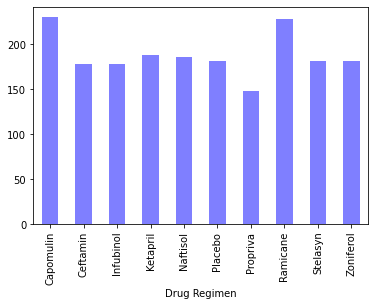

In [158]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_count = clean_df_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

bar_chart = mice_count.plot.bar(color = "b", alpha=0.5, align = "center")
pd.DataFrame.plot(mice_count)

Text(0.5, 0, 'Drug Regimen')

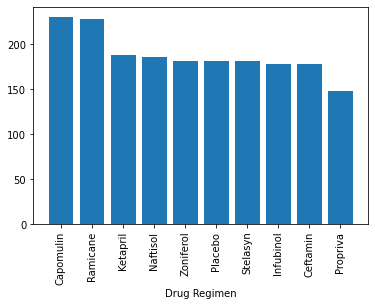

In [159]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_counts_2 = clean_df_data["Drug Regimen"].value_counts()

x_axis = np.arange(len(mice_counts_2))
plt.bar(x_axis, mice_counts_2)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_counts_2.index.values)

# Rotate x axis labels
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")




In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = clean_df_data.copy().groupby("Sex").nunique()["Mouse ID"]
gender_pie



Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Distribution of Male versus Female')

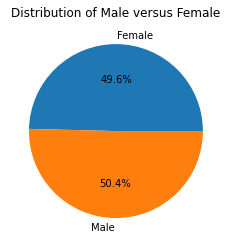

In [161]:
gender_pie.plot(kind = "pie", autopct = "%1.1f%%", ylabel= "")
plt.title("Distribution of Male versus Female")


Text(0.5, 1.0, 'Distribution of Male versus Female')

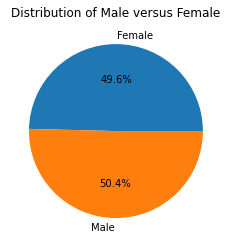

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_pie, labels = ["Female", "Male"], autopct = "%1.1f%%")
plt.title("Distribution of Male versus Female")


## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
drug_treatment = pd.DataFrame(clean_df_data.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index()

drug_treatment

,Mouse ID,Timepoint
0,b447,0
1,x226,0
2,f932,0
3,x336,0
4,l872,0
...,...,...
243,k894,45
244,l471,45
245,l509,45
246,i177,45


In [164]:
drug_treatment

,Mouse ID,Timepoint
0,b447,0
1,x226,0
2,f932,0
3,x336,0
4,l872,0
...,...,...
243,k894,45
244,l471,45
245,l509,45
246,i177,45


In [165]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_treatment_merge = pd.merge(clean_df_data, drug_treatment, on = ["Mouse ID", "Timepoint"])
drug_treatment_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [166]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:
    #locate the rows which contain mice on each drug to get tumor volume for that treatment
    final_tumor_volume = drug_treatment_merge.loc[drug_treatment_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_volume)

    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq - lowerq
    lowerbound = lowerq - (1.5*IQR)
    upperbound = upperq + (1.5*IQR)

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {IQR}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")
print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

The lower quartile of tumor volumes is: 48.72207785
The upper quartile of tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The the median of tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


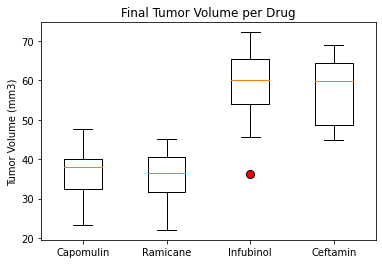

In [167]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker = 'o', markerfacecolor = "r", markersize = 8, markeredgecolor = "black")

plt.boxplot(tumor_volume, flierprops = flierprops)

plt.title("Final Tumor Volume per Drug")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

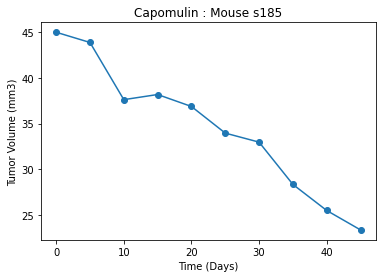

In [168]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_volume_time = clean_df_data.loc[clean_df_data["Mouse ID"] == "s185"]

plt.plot(mouse_volume_time["Timepoint"], mouse_volume_time["Tumor Volume (mm3)"], marker = "o")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin : Mouse s185")

plt.show()

Text(0.5, 1.0, 'Average Tumor Volume vs Weight')

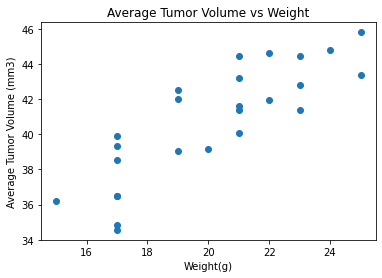

In [173]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_cap = clean_df_data.loc[clean_df_data["Drug Regimen"] == "Capomulin"]
cap_volume = pd.DataFrame(df_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns = {"Tumor Volume (mm3)":"Average Tumor Volume"})
cap_volume = pd.merge(df_cap, cap_volume, on = "Mouse ID")

final_cap_volume = cap_volume[["Weight (g)", "Average Tumor Volume"]]. drop_duplicates()
final_cap_volume

x = final_cap_volume["Weight (g)"]
y  = final_cap_volume["Average Tumor Volume"]

plt.scatter(x,y)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight")

## Correlation and Regression

In [176]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_volume["Weight (g)"],cap_volume["Average Tumor Volume"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.83


The r-squared is: 0.8343958614425941
The equation of the regression line is: y = 0.96x + 21.49


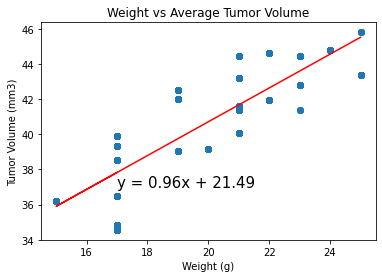

In [179]:
x_values = cap_volume["Weight (g)"]
y_values = cap_volume["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")